In [137]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import hvplot.pandas
%matplotlib inline


In [70]:
# Load .env enviroment variables
load_dotenv()

True

In [71]:
#set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [72]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [73]:
#Convert btc_url to JSON format
import json
btc_url=btc_url + "?format=json"

#Use requests to gather data
requests.get(btc_url)
response_data=requests.get(btc_url)
btc_content=response_data.content

In [74]:
#Generate output
btc_data=response_data.json()
print(json.dumps(btc_data,indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19114493,
            "total_supply": 19114493,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 22931.0,
                    "volume_24h": 14605093391,
                    "market_cap": 438676157540,
                    "percentage_change_1h": -0.0827891384902019,
                    "percentage_change_24h": -1.36664450832381,
                    "percentage_change_7d": -3.05583843046142,
                    "percent_change_1h": -0.0827891384902019,
                    "percent_change_24h": -1.36664450832381,
                    "percent_change_7d": -3.05583843046142
                }
            },
            "last_updated": 1659837553
        }
    },
    "metadata": {
        "timestamp": 1659837553,
        "num

In [75]:
btc_price=btc_data["data"]["1"]["quotes"]["USD"]["price"]
print(btc_price)

22931.0


In [76]:
#Repeat process for ETH 
eth_url=eth_url+"?format=json"
requests.get(eth_url)
response_data=requests.get(eth_url)
eth_content=response_data.content

In [77]:
eth_data=response_data.json()
print(json.dumps(eth_data,indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 119992002,
            "total_supply": 119992002,
            "max_supply": 119992002,
            "quotes": {
                "USD": {
                    "price": 1677.43,
                    "volume_24h": 10515804533,
                    "market_cap": 201299404217,
                    "percentage_change_1h": -0.0682576465455791,
                    "percentage_change_24h": -3.2598571502181,
                    "percentage_change_7d": -1.1407722140994,
                    "percent_change_1h": -0.0682576465455791,
                    "percent_change_24h": -3.2598571502181,
                    "percent_change_7d": -1.1407722140994
                }
            },
            "last_updated": 1659837491
        }
    },
    "metadata": {
        "timestamp": 1659837491,
     

In [78]:
eth_price=eth_data['data']['1027']['quotes']['USD']['price']
print(eth_price)

1677.43


In [79]:
# Compute current value of my crpto
btc_value=(my_btc*btc_price)
eth_value=(my_eth*eth_price)
total_value_crypto = (btc_value) + (eth_value)

In [80]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $27517.20
The current value of your 5.3 ETH is $8890.38


In [81]:
#Current amount of shares
my_agg=200
my_spy=50

In [82]:
#Alpaca API KEYs
alpaca_api_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

In [83]:
#Alpaca API object
alpaca=tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [84]:
#current date in ISO format
today=pd.Timestamp("2022-08-05",tz="US/Eastern").isoformat()

In [85]:
tickers=['AGG','SPY']

In [86]:
#Timeframe for Alpaca API
timeframe='1day'

In [87]:
#closing prices for AGG,SPY
df_port=alpaca.get_bars(tickers,timeframe,start=today,end=today).df
df_port.head()                      

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-08-05 04:00:00+00:00,102.81,102.83,102.52,102.71,4847064,16418,102.711038,AGG
2022-08-05 04:00:00+00:00,409.68,414.15,409.60,413.47,56751151,455450,412.292366,SPY


In [88]:
#Seperate tickers
AGG=df_port[df_port['symbol']=='AGG'].drop('symbol',axis=1)
SPY=df_port[df_port['symbol']=='SPY'].drop('symbol',axis=1)

In [89]:
df_port=pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])

In [90]:
df_port.head()


AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-08-05 04:00:00+00:00  102.81  102.83  102.52  102.71  4847064   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2022-08-05 04:00:00+00:00       16418  102.711038  409.68  414.15  409.6   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-08-05 04:00:00+00:00  413.47  56751151      455450  412.292366

In [91]:
#Create closing prices
agg_close=float(df_port["AGG"]["close"])
spy_close=float(df_port["SPY"]["close"])

In [92]:
#Closing prices for AGG and SPY
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $102.71
Current SPY closing price: $413.47


In [93]:
#current value of shares
my_agg_value=(my_agg*agg_close)
my_spy_value=(my_spy*spy_close)

In [94]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")

The current value of your 50 SPY shares is $20673.5
The current value of your 200 AGG shares is $20542.0


In [95]:
#Calculate total value of shares
total_value_shares=(my_agg_value+my_spy_value)
#Calculate total value of cyrpto
total_value_cyrpto=(btc_value+eth_value)

In [96]:
#monthly household income
monthly_income=12000

In [97]:
#total financial assets
assets=["Cyrpto","Shares"]
amount={"amount":[total_value_cyrpto,total_value_shares]}

df_savings=pd.DataFrame(amount,index=assets)

In [98]:
df_savings

,amount
Cyrpto,36407.579
Shares,41215.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

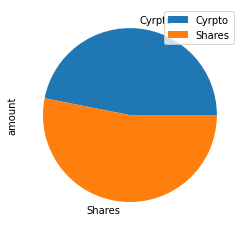

In [99]:
#Savings pie chart
df_savings.plot(kind='pie',subplots=True)

In [100]:
#Ideal emergency fund
emergency_fund=monthly_income*3
emergency_fund

36000

In [136]:
#total savings
total_savings=total_value_cyrpto+total_value_shares
total_savings

77623.079

In [102]:
#Validate savings 

if total_savings > emergency_fund:
    print("Nice job, you have enough money in your emergency fund!")
elif total_savings == emergency_fund:
    print("Congrats! You reached your goal")
elif total_savings < emergency_fund:
    print(f"You are {total_savings - emergency_fund} away from your goal")

Nice job, you have enough money in your emergency fund!


In [103]:
#Monte Carlo Simulation

# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()


In [104]:
#Tickers and weights
tickers=["SPY","AGG"]


In [105]:
#get 5 years of data for SPY,AGG
df_tickers=alpaca.get_bars(tickers,timeframe,start=start_date,end=end_date).df

In [106]:
#Reorganize data
SPY=df_tickers[df_tickers['symbol']=='SPY'].drop('symbol',axis=1)
AGG=df_tickers[df_tickers['symbol']=='AGG'].drop('symbol',axis=1)
df_tickers=pd.concat([SPY,AGG],axis=1,keys=['SPY','AGG'])
df_tickers.head()


SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967

In [107]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [108]:
# Configuring a Monte Carlo simulation 30 years, 500 runs, 60/40 stocks/bonds
MC_thirty_year = MCSimulation(
    portfolio_data = df_tickers,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [111]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.tail()

SPY                                      \
                             open    high       low   close    volume   
timestamp                                                               
2021-04-26 04:00:00+00:00  417.42  418.22  416.8111  417.61  51824860   
2021-04-27 04:00:00+00:00  417.97  418.14  416.3000  417.52  50297139   
2021-04-28 04:00:00+00:00  417.84  419.01  416.9000  417.40  50692781   
2021-04-29 04:00:00+00:00  420.38  420.72  416.4400  420.06  76965583   
2021-04-30 04:00:00+00:00  417.67  418.54  416.3400  417.30  84731942   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2021-04-26 04:00:00+00:00      295870  417.508245     0.002088  114.74   
2021-04-27 04:00:00+00:00      296300  417.481360    -0.000216  114.60   
2021-04-28 04:00:00+00:00      330049  417.742098    -0.000287  114.45   
2021-04-29 04:00:00+00:00      443396  418.824046     0.006373  114.14   
2021-04-30 04:00:00+00:00      478844  417.651995    -0.006570  114.41   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2021-04-26 04:00:00+00:00  114.8015  114.65  114.65  3480303       13520   
2021-04-27 04:00:00+00:00  115.1300  114.37  114.37  3820640       12720   
2021-04-28 04:00:00+00:00  114.4685  114.20  114.43  7075831       24303   
2021-04-29 04:00:00+00:00  114.3700  114.09  114.37  6208142       21096   
2021-04-30 04:00:00+00:00  114.5150  114.33  114.49  6469432       19582   

                                                    
                                 vwap daily_return  
timestamp                                           
2021-04-26 04:00:00+00:00  114.706244    -0.000871  
2021-04-27 04:00:00+00:00  114.498315    -0.002442  
2021-04-28 04:00:00+00:00  114.379810     0.000525  
2021-04-29 04:00:00+00:00  114.250702    -0.000524  
2021-04-30 04:00:00+00:00  114.456246     0.001049

In [112]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\cstan\OneDrive\RUfiles\RU_homework\APIsHW\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991431,1.004967,0.998617,0.995680,1.002621,1.006708,0.988185,0.990476,0.992481,0.986254,...,0.997751,1.003638,1.005769,0.997586,1.001753,0.998293,1.012113,1.012565,1.009517,1.006965
2,1.001982,1.011320,0.984725,1.000695,0.989151,1.000246,0.987232,0.986425,0.979454,0.987407,...,0.989672,1.000299,0.991634,1.006532,1.002139,1.011387,0.998453,1.010944,1.002497,1.002848
3,0.994863,1.008745,0.974712,1.006320,1.006176,1.007229,0.984724,0.992905,0.983413,0.986212,...,0.982159,0.990590,0.982306,1.005907,1.014210,1.010456,0.991168,1.010600,0.991279,1.008391
4,0.991914,1.008841,0.977348,1.011268,1.013188,1.013644,0.990475,0.998950,0.980809,0.980688,...,0.972138,1.003328,0.983895,1.000405,1.018194,1.016565,0.995459,1.019326,0.988562,1.013491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.317382,8.503532,9.525313,17.734785,15.599698,5.201347,35.999055,17.644002,28.507063,9.920811,...,25.548466,11.311743,18.855798,27.440825,31.790184,16.780454,9.170994,12.484624,7.766588,13.150238
7557,5.277492,8.552917,9.629595,17.801551,15.501043,5.154502,36.342032,17.455080,28.714969,9.816019,...,25.631137,11.264551,18.857228,27.240610,32.244891,16.554091,9.198399,12.450405,7.741988,13.149851
7558,5.294915,8.447891,9.708718,17.864181,15.584333,5.125268,36.425541,17.471887,28.700468,9.920259,...,25.843322,11.325151,18.965569,27.096881,32.272637,16.491568,9.218267,12.341893,7.763923,13.203298
7559,5.248299,8.457977,9.793600,17.993849,15.538994,5.113548,36.689119,17.325591,28.915111,9.910349,...,26.061825,11.284010,18.998898,26.815457,32.520341,16.431515,9.118896,12.224513,7.747074,13.090839


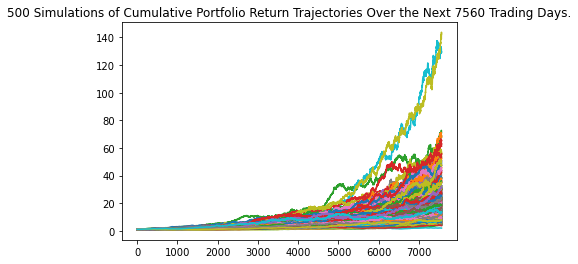

In [120]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

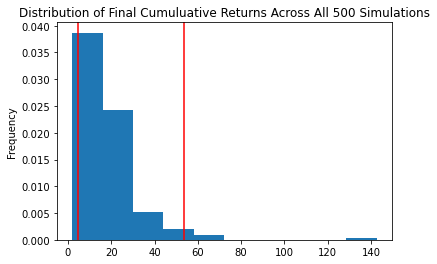

In [121]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

In [ ]:
#Retirement Analysis
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

In [127]:
# Print summary statistics
print(tbl)

count           500.000000
mean             18.257921
std              13.558584
min               1.924893
25%              10.380487
50%              15.241567
75%              22.033019
max             142.541452
95% CI Lower      4.772746
95% CI Upper     53.550412
Name: 7560, dtype: float64


In [130]:
#Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.
# Set initial investment
initial_investment = 20000

In [131]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

In [132]:
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95454.91 and $1071008.24


In [134]:
#Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143182.37 and $1606512.36


In [140]:
#Optional Challenge - Early Retirement-Five Years Retirement Option
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns, 65% stocks 35% bonds
MC_five_year = MCSimulation(
    portfolio_data = df_tickers,
    weights = [.65,.35],
    num_simulation = 500,
    num_trading_days = 252*5)

In [141]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns, 65% stocks 35% bonds
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\cstan\OneDrive\RUfiles\RU_homework\APIsHW\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002574,1.001026,0.998818,1.001796,0.996079,1.015032,1.001574,1.002254,1.016819,1.011773,...,1.000950,1.005741,0.993356,1.001511,0.989024,0.993199,1.001484,0.999974,0.996595,0.994384
2,1.001347,1.000920,0.994475,1.010505,0.992141,1.016743,1.006457,1.006604,1.022309,1.017919,...,0.994875,1.007040,0.981116,1.014600,0.982099,0.984472,1.011174,1.005638,0.991832,0.993421
3,1.005624,1.000675,1.000840,1.028574,0.987211,1.022768,1.003339,0.991944,1.023193,1.026239,...,1.004754,1.017672,0.985119,1.024954,0.979642,0.997430,1.007914,1.009262,0.997753,0.996815
4,0.994255,1.004900,0.989675,1.040412,0.989411,1.038590,1.009475,0.988834,1.010805,1.037077,...,0.999806,1.018774,0.984851,1.020855,0.980414,0.999497,1.005972,0.993429,0.996528,0.991541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.246051,1.744583,2.305052,3.053395,1.268798,1.732868,1.510340,1.783849,1.196678,1.793695,...,1.268295,1.016548,0.942128,2.146417,1.403649,2.254586,2.073800,1.752502,1.214897,1.314277
1257,2.267592,1.749644,2.290111,3.058860,1.257871,1.744038,1.501639,1.788113,1.220227,1.793434,...,1.261661,0.999868,0.937010,2.150684,1.414981,2.267188,2.050191,1.771233,1.210494,1.310846
1258,2.254624,1.774890,2.321278,3.030995,1.273657,1.744164,1.498195,1.810897,1.220469,1.803988,...,1.271129,1.000607,0.940716,2.156289,1.397433,2.255749,2.066399,1.766551,1.216049,1.307287
1259,2.273311,1.796417,2.344379,3.038028,1.266995,1.755070,1.500329,1.818505,1.226679,1.813756,...,1.287557,0.998385,0.940166,2.133156,1.390592,2.259515,2.070349,1.768902,1.215428,1.293565


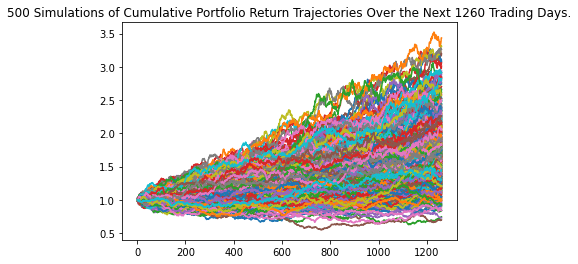

In [142]:
# Plot simulation
line_plot = MC_five_year.plot_simulation() 

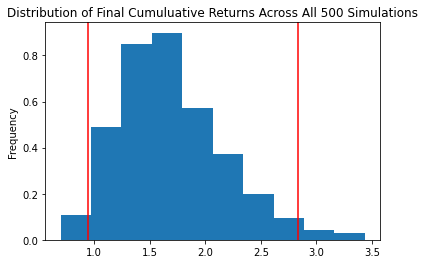

In [143]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [144]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5yr = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_5yr)

count           500.000000
mean              1.691892
std               0.475263
min               0.698203
25%               1.324092
50%               1.635090
75%               1.946485
max               3.435377
95% CI Lower      0.942561
95% CI Upper      2.837851
Name: 1260, dtype: float64


In [146]:
# Set initial investment
initial_investment=20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(tbl_5yr[8]*20000,2)
ci_upper_five = round(tbl_5yr[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18851.21 and $56757.02


In [147]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns 70% stocks 30% bonds
MC_ten_year = MCSimulation(
    portfolio_data = df_tickers,
    weights = [.7,.3],
    num_simulation = 500,
    num_trading_days = 252*10)

In [148]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\cstan\OneDrive\RUfiles\RU_homework\APIsHW\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993891,0.979719,0.998456,1.005928,0.993066,0.994865,1.008392,0.994894,1.004411,0.999934,...,1.013908,0.990813,0.996749,0.974396,0.996735,1.008923,0.991595,1.010856,1.010746,1.000648
2,1.004543,0.979073,1.005289,0.995188,0.994404,0.993990,1.003327,1.003205,1.006751,0.997595,...,1.013831,0.966045,0.987738,0.974635,0.993894,1.013457,0.983904,1.005815,1.003286,0.993926
3,1.017159,0.987968,1.004310,0.992978,1.012410,1.010571,1.012781,0.996490,0.994933,1.011626,...,1.026911,0.966666,0.989648,0.980883,0.997272,1.005511,0.995386,1.013658,1.006040,0.985253
4,1.011569,1.004541,0.999569,1.005818,1.011962,1.004124,1.012374,1.003428,1.005417,1.006460,...,1.035433,0.981004,0.977332,0.984161,1.007536,1.013416,1.001658,1.013913,1.005154,0.989032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.755268,2.194553,3.557968,2.835854,5.650819,4.159189,3.530670,2.924082,1.420578,3.740939,...,4.502409,2.321501,1.388041,4.511440,2.817817,2.404763,2.812222,5.460522,2.204265,5.806154
2517,3.781849,2.209653,3.541006,2.834103,5.647927,4.219344,3.504138,2.932175,1.411367,3.815959,...,4.436005,2.290457,1.377233,4.485354,2.793345,2.429692,2.807312,5.447031,2.238822,5.794903
2518,3.764761,2.204597,3.535638,2.863045,5.767100,4.239789,3.487893,2.907031,1.416001,3.826434,...,4.411522,2.294519,1.387451,4.438713,2.808318,2.422516,2.772387,5.456928,2.251543,5.861316
2519,3.781971,2.195856,3.563840,2.894010,5.690598,4.230095,3.471975,2.930933,1.409747,3.790801,...,4.370938,2.299824,1.380760,4.386715,2.826057,2.446374,2.770290,5.477792,2.276433,5.898283


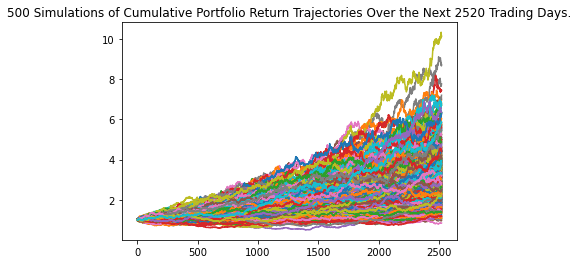

In [149]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

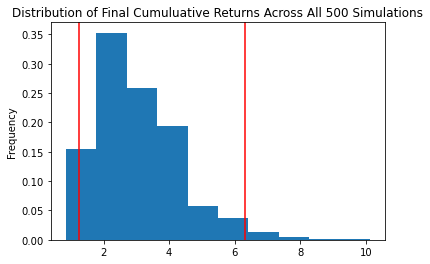

In [150]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

In [151]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10yr = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl_10yr)

count           500.000000
mean              3.056107
std               1.309111
min               0.841666
25%               2.097231
50%               2.784984
75%               3.815253
max              10.134101
95% CI Lower      1.246470
95% CI Upper      6.311214
Name: 2520, dtype: float64


In [152]:
# Set initial investment
initial_investment=20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10yr[8]*20000,2)
ci_upper_ten = round(tbl_10yr[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $24929.39 and $126224.28
